# Forex Market Prediction

In [1]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

warnings.filterwarnings("ignore")

df = pd.read_csv('Train_small.csv') 
X = df[df.columns.difference(['Unnamed: 0', 'up_down'])]
y = df['up_down'].values.astype('float64')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

test_data = pd.read_csv('Test_small_features.csv')
test_data = test_data.drop(['Unnamed: 0'], axis=1)

SVM

In [2]:
from sklearn.svm import SVC 

svc = SVC(kernel='linear', max_iter=680) 
svc.fit(X_train, y_train)

y_pred_svm = svc.predict(X_test) 
print("Accuracy = " + str(accuracy_score(y_test, y_pred_svm)))

#1000 - 0.6648877253046017
#1500 - 0.43
#100 -  0.33440741113684425
#600 - 0.66508911489276
#700 - 0.6652905044809183
#680 - 0.6654918940690766

Accuracy = 0.6654918940690766


In [3]:
import numpy as np
print(classification_report(y_test, y_pred_svm))
confusion_matrix = confusion_matrix(y_test, y_pred_svm)
confusion_matrix

              precision    recall  f1-score   support

         0.0       0.67      0.97      0.79      6618
         1.0       0.49      0.05      0.09      3313

   micro avg       0.67      0.67      0.67      9931
   macro avg       0.58      0.51      0.44      9931
weighted avg       0.61      0.67      0.56      9931



array([[6439,  179],
       [3143,  170]])

In [ ]:
test_pred_svm = svc.predict(test_data)
df = pd.DataFrame(test_pred_svm[:,None], columns=['up_down'])

#test_data = pd.read_csv('Test_small_feature.csv')
#test_data = test_data.drop(['Gmt time', 'Unnamed: 0'], axis=1)
#print(test_data.iloc[:, 2:])
data = pd.DataFrame({'up_down':test_pred_dc})
filepath = 'test_prediction_svm.csv'
data.to_csv(filepath, index=False)

Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(random_state = 1234, max_depth=6, min_samples_leaf=1000)
clf.fit(X_train, y_train)

y_pred_dt = clf.predict(X_test)
print(accuracy_score(y_test, y_pred_dt)) 
print(classification_report(y_test, y_pred_dt))

0.6652905044809183
              precision    recall  f1-score   support

         0.0       0.71      0.84      0.77      6618
         1.0       0.50      0.31      0.38      3313

   micro avg       0.67      0.67      0.67      9931
   macro avg       0.60      0.58      0.58      9931
weighted avg       0.64      0.67      0.64      9931



In [ ]:
#test_data = pd.read_csv('Test_small_feature.csv')
test_pred_dc = clf.predict(test_data)
df = pd.DataFrame(test_pred_dc[:,None], columns=['up_down'])

#test_data = pd.read_csv('Test_small_feature.csv')
#test_data = test_data.drop(['Gmt time', 'Unnamed: 0'], axis=1)
#print(test_data.iloc[:, 2:])
data = pd.DataFrame({'up_down':test_pred_dc})
filepath = 'test_prediction_dt.csv'
data.to_csv(filepath, index=False)

In [8]:
from sklearn.ensemble import RandomForestClassifier

rand = RandomForestClassifier(n_estimators = 1000)
rand.fit(X_train, y_train)

y_pred_rf = rand.predict(X_test)
print(accuracy_score(y_test, y_pred_rf)) 
print(classification_report(y_test, y_pred_rf))

#1000 - 0.6697210754204007
#200 - 0.6649884200986809

0.6702245493907965
              precision    recall  f1-score   support

         0.0       0.71      0.86      0.78      6618
         1.0       0.51      0.29      0.37      3313

   micro avg       0.67      0.67      0.67      9931
   macro avg       0.61      0.58      0.57      9931
weighted avg       0.64      0.67      0.64      9931



In [37]:
#test_data = pd.read_csv('Test_small_feature.csv')
test_pred_rf = rand.predict(test)
df = pd.DataFrame(test_pred_rf[:,None], columns=['up_down'])

#test_data = pd.read_csv('Test_small_feature.csv')
#test_data = test_data.drop(['Gmt time', 'Unnamed: 0'], axis=1)
#print(test_data.iloc[:, 2:])
data = pd.DataFrame({'up_down':test_pred_dc})
filepath = 'test_prediction_rf.csv'
data.to_csv(filepath, index=False)

Neural Networks

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

#mlp = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(200), random_state=1)
#mlp.fit(X_train, y_train) 
#y_pred_mlp = clf.predict(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(214, 215), max_iter=100)
mlp.fit(X_train,y_train)

y_pred_mlp = mlp.predict(X_test)

print(accuracy_score(y_test, y_pred_mlp)) 
print(classification_report(y_test, y_pred_mlp))

0.6255160608196556
              precision    recall  f1-score   support

         0.0       0.92      0.48      0.63      6618
         1.0       0.47      0.92      0.62      3313

   micro avg       0.63      0.63      0.63      9931
   macro avg       0.70      0.70      0.63      9931
weighted avg       0.77      0.63      0.63      9931



In [34]:
test_pred_mlp = mlp.predict(test)
df = pd.DataFrame(test_pred_mlp[:,None], columns=['up_down'])

#test_data = pd.read_csv('Test_small_feature.csv')
#test_data = test_data.drop(['Gmt time', 'Unnamed: 0'], axis=1)
#print(test_data.iloc[:, 2:])
data = pd.DataFrame({'up_down':test_pred_dc})
filepath = 'test_prediction_mlp.csv'
data.to_csv(filepath, index=False)

In [2]:
#Not needed
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 100)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True False False False  True False  True  True False False  True  True
  True  True False  True  True False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False  True  True  True  True
  True  True  True  True False False False  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True False False
  True False  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [3]:
#Not needed
X_train_lr = X_train.iloc[:,rfe.support_ == True]
X_test_lr = X_test.iloc[:,rfe.support_ == True]

logreg = LogisticRegression()
logreg.fit(X_train_lr, y_train)
y_test_pred = logreg.predict(X_test_lr)
print("Logistic regression score on the test data = " + str(logreg.score(X_test_lr, y_test)))


Logistic regression score on the test data = 0.6605578491591985


In [4]:
#Not needed
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix)
print(classification_report(y_test, y_test_pred))

[[6057  561]
 [2810  503]]
              precision    recall  f1-score   support

         0.0       0.68      0.92      0.78      6618
         1.0       0.47      0.15      0.23      3313

   micro avg       0.66      0.66      0.66      9931
   macro avg       0.58      0.53      0.51      9931
weighted avg       0.61      0.66      0.60      9931



In [22]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=16000)
logreg.fit(X_train, y_train)
y_test_pred = logreg.predict(X_test)
print("Logistic regression score on the test data = " + str(logreg.score(X_test, y_test)))


Logistic regression score on the test data = 0.6651898096868392


In [16]:
#Not needed
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix)
print(classification_report(y_test, y_test_pred))

[[5766  852]
 [2477  836]]
              precision    recall  f1-score   support

         0.0       0.70      0.87      0.78      6618
         1.0       0.50      0.25      0.33      3313

   micro avg       0.66      0.66      0.66      9931
   macro avg       0.60      0.56      0.56      9931
weighted avg       0.63      0.66      0.63      9931



ROC Curve

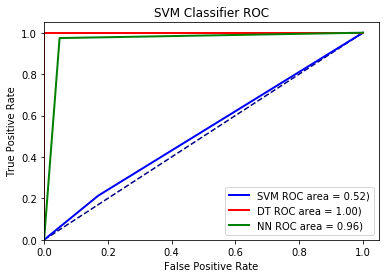

In [10]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_dt)
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_mlp)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred_rf)
roc_auc4 = auc(fpr4, tpr4)

plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.title('SVM Classifier ROC')
plt.plot(fpr, tpr, color='blue', lw=2, label='SVM ROC area = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, color='red', lw=2, label='DT ROC area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='green', lw=2, label='NN ROC area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='yellow', lw=2, label='NN ROC area = %0.2f)' % roc_auc4)
plt.legend(loc="lower right")
plt.show()